In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dir="./"

In [8]:
def simpson_similarity_coefficient(list_a, list_b): 
    set_intersection = set.intersection(set(list_a), set(list_b))
    num_intersection = len(set_intersection)
 
    set_union = set.union(set(list_a), set(list_b))
    num_union = len(set_union)
    nmin = np.amin([len(list_a), len(list_b)])
 
    try:
        return float(num_intersection) / nmin
    except ZeroDivisionError:
        return 1.0 
    
def simpson_similarity_coefficient_ranking(_list_a, _list_b, num): 
    list_a = _list_a[0:num]
    list_b = _list_b[0:num]
    set_intersection = set.intersection(set(list_a), set(list_b))
    num_intersection = len(set_intersection)
 
    set_union = set.union(set(list_a), set(list_b))
    num_union = len(set_union)
    nmin = np.amin([len(list_a), len(list_b)])
 
    try:
        return float(num_intersection) / nmin
    except ZeroDivisionError:
        return 1.0 

## All DEGs (FDR < 0.01)

Rad21_d2 5921
Rad21_d3 4434
NIPBL7_d2 5796
NIPBL7_d3 5715
NIPBL8 5405
Rad21_NIPBL 5872
CTCF 2134
WAPL 4700
PDS5A 1944
PDS5B 5937
PDS5AB 5699
Mau2 4106
ESCO1 6632
JQ1 6875


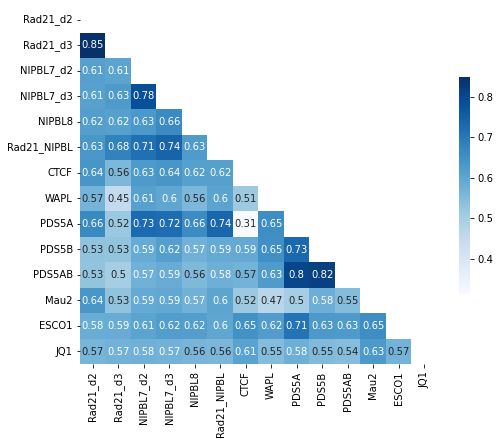

In [9]:
samplelist = ["Rad21_d2", "Rad21_d3", "NIPBL7_d2", "NIPBL7_d3", "NIPBL8", "Rad21_NIPBL", "CTCF", "WAPL", "PDS5A", "PDS5B", "PDS5AB", "Mau2", "ESCO1", "JQ1"]

p=0.01

DEG = {}
for i, sample in enumerate(samplelist):
    DEG[sample] = pd.read_csv(dir + str(p) + '/Ct-' + sample +'.genes.count.GRCh38.DESeq2.DEGs.tsv', sep="\t")
    print (sample, len(DEG[sample]))

nsamples = len(samplelist)

simmatrix = np.zeros((nsamples, nsamples))
for i, sample1 in enumerate(samplelist):
    for j, sample2 in enumerate(samplelist):
        if i == j:
            simmatrix[i,j] = 1
        else:
            simmatrix[i,j] = simpson_similarity_coefficient(DEG[sample1]["genename"], DEG[sample2]["genename"])

mat = pd.DataFrame(simmatrix, index=samplelist, columns=samplelist)
mat

heat = np.ones((mat.shape[0],mat.shape[0]))
mask = np.zeros((len(heat),len(heat)))
mask[np.triu_indices_from(mask, k=0)] = True

plt.figure(figsize=(8,8))
sns.heatmap(mat, cmap='Blues', square=True, cbar_kws={"shrink": .5}, mask=mask, annot=True)
#plt.savefig("heatmap.simpson.full." + str(p) + ".pdf")

Rad21_d3 4434
NIPBL7_d3 5715
Rad21_NIPBL 5872
Mau2 4106
WAPL 4700
PDS5A 1944
PDS5B 5937
PDS5AB 5699
ESCO1 6632
CTCF 2134
JQ1 6875


<AxesSubplot:>

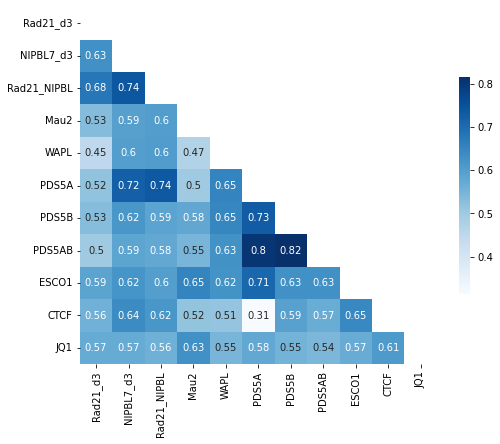

In [11]:
samplelist = ["Rad21_d3", "NIPBL7_d3", "Rad21_NIPBL", "Mau2", "WAPL", "PDS5A", "PDS5B", "PDS5AB", "ESCO1", "CTCF", "JQ1"]

DEG = {}
for i, sample in enumerate(samplelist):
    DEG[sample] = pd.read_csv(dir + str(p) + '/Ct-' + sample +'.genes.count.GRCh38.DESeq2.DEGs.tsv', sep="\t")
    print (sample, len(DEG[sample]))

nsamples = len(samplelist)

simmatrix = np.zeros((nsamples, nsamples))
for i, sample1 in enumerate(samplelist):
    for j, sample2 in enumerate(samplelist):
        if i == j:
            simmatrix[i,j] = 1
        else:
            simmatrix[i,j] = simpson_similarity_coefficient(DEG[sample1]["genename"], DEG[sample2]["genename"])

mat = pd.DataFrame(simmatrix, index=samplelist, columns=samplelist)
mat

heat = np.ones((mat.shape[0],mat.shape[0]))
mask = np.zeros((len(heat),len(heat)))
mask[np.triu_indices_from(mask, k=0)] = True

plt.figure(figsize=(8,8))
sns.heatmap(mat, cmap='Blues', square=True, cbar_kws={"shrink": .5}, mask=mask, annot=True)
#plt.savefig("heatmap.simpson.small." + str(p) + ".pdf")

### top1000 DEGs 

Rad21_d2 5921
Rad21_d3 4434
NIPBL7_d2 5796
NIPBL7_d3 5715
NIPBL8 5405
Rad21_NIPBL 5872
CTCF 2134
WAPL 4700
PDS5A 1944
PDS5B 5937
PDS5AB 5699
Mau2 4106
ESCO1 6632
JQ1 6875


<AxesSubplot:>

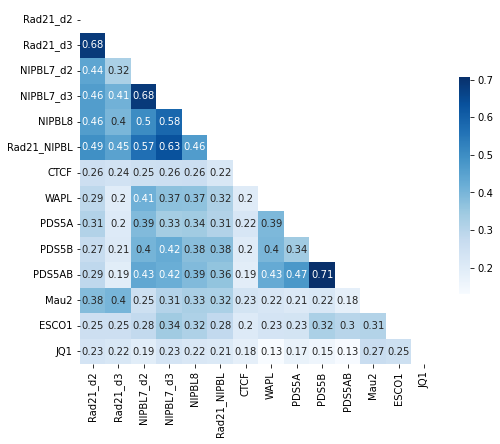

In [12]:
samplelist = ["Rad21_d2", "Rad21_d3", "NIPBL7_d2", "NIPBL7_d3", "NIPBL8", "Rad21_NIPBL", 
              "CTCF", "WAPL", "PDS5A", "PDS5B", "PDS5AB", "Mau2", "ESCO1", "JQ1"]

DEG = {}
for i, sample in enumerate(samplelist):
    DEG[sample] = pd.read_csv(dir + str(p) + '/Ct-' + sample +'.genes.count.GRCh38.DESeq2.DEGs.tsv', sep="\t")
    print (sample, len(DEG[sample]))

nsamples = len(samplelist)

simmatrix = np.zeros((nsamples, nsamples))
for i, sample1 in enumerate(samplelist):
    for j, sample2 in enumerate(samplelist):
        if i == j:
            simmatrix[i,j] = 1
        else:
            simmatrix[i,j] = simpson_similarity_coefficient_ranking(DEG[sample1]["genename"], DEG[sample2]["genename"], 1000)

mat = pd.DataFrame(simmatrix, index=samplelist, columns=samplelist)
mat

heat = np.ones((mat.shape[0],mat.shape[0]))
mask = np.zeros((len(heat),len(heat)))
mask[np.triu_indices_from(mask, k=0)] = True

plt.figure(figsize=(8,8))
sns.heatmap(mat, cmap='Blues', square=True, cbar_kws={"shrink": .5}, mask=mask, annot=True)
#plt.savefig("heatmap.simpson.full.top1000.pdf")

In [13]:
for i, sample in enumerate(samplelist):
    DEG[sample] = pd.read_csv(dir + str(p) + '/Ct-' + sample +'.genes.count.GRCh38.DESeq2.DEGs.tsv', sep="\t")
    print (sample, sum(DEG[sample][0:1000]["type"]=="protein_coding"))

Rad21_d2 967
Rad21_d3 949
NIPBL7_d2 985
NIPBL7_d3 983
NIPBL8 977
Rad21_NIPBL 963
CTCF 958
WAPL 976
PDS5A 979
PDS5B 980
PDS5AB 977
Mau2 981
ESCO1 987
JQ1 969


Rad21_d3 4434
NIPBL7_d3 5715
Rad21_NIPBL 5872
CTCF 2134
WAPL 4700
PDS5A 1944
PDS5B 5937
PDS5AB 5699
Mau2 4106
ESCO1 6632
JQ1 6875


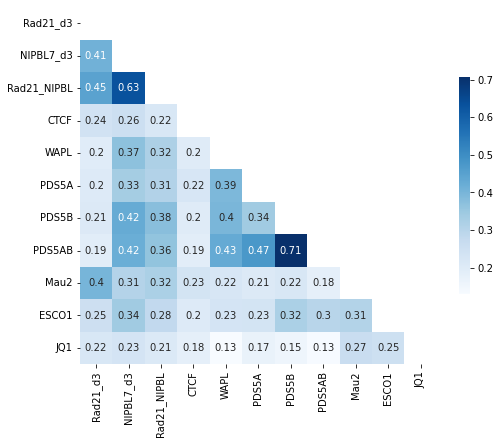

In [14]:
samplelist = ["Rad21_d3", "NIPBL7_d3", "Rad21_NIPBL", "CTCF", "WAPL", "PDS5A", "PDS5B", "PDS5AB", "Mau2", "ESCO1", "JQ1"]

DEG = {}
for i, sample in enumerate(samplelist):
    DEG[sample] = pd.read_csv(dir + str(p) + '/Ct-' + sample +'.genes.count.GRCh38.DESeq2.DEGs.tsv', sep="\t")
    print (sample, len(DEG[sample]))

nsamples = len(samplelist)

simmatrix = np.zeros((nsamples, nsamples))
for i, sample1 in enumerate(samplelist):
    for j, sample2 in enumerate(samplelist):
        if i == j:
            simmatrix[i,j] = 1
        else:
            simmatrix[i,j] = simpson_similarity_coefficient_ranking(DEG[sample1]["genename"], DEG[sample2]["genename"], 1000)

mat = pd.DataFrame(simmatrix, index=samplelist, columns=samplelist)
mat

heat = np.ones((mat.shape[0],mat.shape[0]))
mask = np.zeros((len(heat),len(heat)))
mask[np.triu_indices_from(mask, k=0)] = True

plt.figure(figsize=(8,8))
sns.heatmap(mat, cmap='Blues', square=True, cbar_kws={"shrink": .5}, mask=mask, annot=True)
#plt.savefig("heatmap.simpson.small.top1000.pdf")

Rad21_d3 1000
NIPBL7_d3 1000
Rad21_NIPBL 1000
Mau2 1000
WAPL 1000
PDS5A 1000
PDS5B 1000
PDS5AB 1000
ESCO1 1000
CTCF 1000
JQ1 1000


<AxesSubplot:>

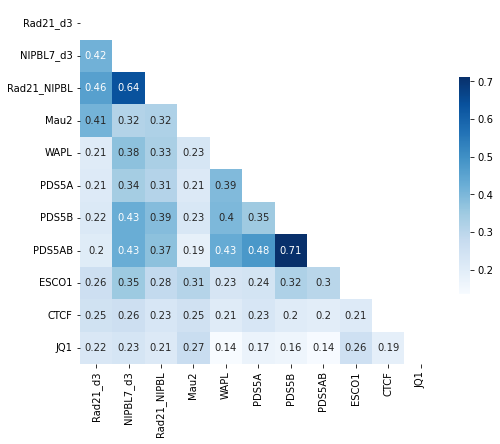

In [15]:
samplelist = ["Rad21_d3", "NIPBL7_d3", "Rad21_NIPBL", "Mau2", "WAPL", "PDS5A", "PDS5B", "PDS5AB", "ESCO1", "CTCF", "JQ1"]

DEG = {}
for i, sample in enumerate(samplelist):
    DEG[sample] = pd.read_csv(dir + 'top1000/Ct-' + sample +'.tsv', sep="\t", header=None)
    print (sample, len(DEG[sample]))

nsamples = len(samplelist)

simmatrix = np.zeros((nsamples, nsamples))
for i, sample1 in enumerate(samplelist):
    for j, sample2 in enumerate(samplelist):
        if i == j:
            simmatrix[i,j] = 1
        else:
            simmatrix[i,j] = simpson_similarity_coefficient(DEG[sample1][1], DEG[sample2][1])

mat = pd.DataFrame(simmatrix, index=samplelist, columns=samplelist)
mat

heat = np.ones((mat.shape[0],mat.shape[0]))
mask = np.zeros((len(heat),len(heat)))
mask[np.triu_indices_from(mask, k=0)] = True

plt.figure(figsize=(8,8))
sns.heatmap(mat, cmap='Blues', square=True, cbar_kws={"shrink": .5}, mask=mask, annot=True)
#plt.savefig("heatmap.simpson.small.top1000.pdf")

## DEG overlap list

In [19]:
samplelist = ["Rad21_d3", "NIPBL7_d3", "Rad21_NIPBL", "Mau2", "WAPL", "PDS5A", "PDS5B", "PDS5AB", "ESCO1", "CTCF", "JQ1"]

DEG = {}
for i, sample in enumerate(samplelist):
    for s in ["up", "down"]:
        DEG[sample + s] = pd.read_csv(dir + str(p) + '/Ct-' + sample +'.genes.count.GRCh38.DESeq2.' + s + 'DEGs.tsv', sep="\t")
        print (sample + s, len(DEG[sample + s]))

Rad21_d3up 2115
Rad21_d3down 2319
NIPBL7_d3up 2528
NIPBL7_d3down 3187
Rad21_NIPBLup 2687
Rad21_NIPBLdown 3185
Mau2up 1882
Mau2down 2224
WAPLup 2179
WAPLdown 2521
PDS5Aup 807
PDS5Adown 1137
PDS5Bup 2546
PDS5Bdown 3391
PDS5ABup 2274
PDS5ABdown 3425
ESCO1up 2904
ESCO1down 3728
CTCFup 1016
CTCFdown 1118
JQ1up 3487
JQ1down 3388


In [20]:
genelist = DEG["Rad21_d3up"]["genename"]

for i, sample in enumerate(samplelist):
    for s in ["up", "down"]:
        genelist = pd.concat([genelist, DEG[sample+s]["genename"]])
    
genelist = genelist.drop_duplicates()

colnames = []
for i, sample in enumerate(samplelist):
    colnames.append(sample)

In [22]:
df = pd.DataFrame(0, columns=colnames, index=genelist)

for i, sample in enumerate(samplelist):
    df.loc[DEG[sample+ "up"]["genename"], sample] = 1
for i, sample in enumerate(samplelist):
    df.loc[DEG[sample+ "down"]["genename"], sample] = -1

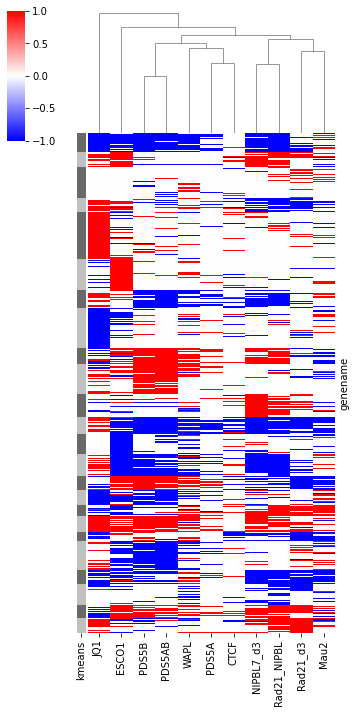

In [23]:
ncluster=24

from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(random_state=0, n_clusters=ncluster, max_iter=10000)
df["kmeans"] = model.fit_predict(df)

df = df.sort_values(by=['kmeans'])
lut = dict(zip(df["kmeans"].unique(), ["dimgray", "silver"]*100))
row_colors = df["kmeans"].map(lut)

val = df.iloc[:,0:df.shape[1]-1]
sns_plot = sns.clustermap(val, row_colors=row_colors, col_cluster=True, row_cluster=False,
                         figsize=(5, 10), cmap="bwr", yticklabels=False)
#sns_plot.savefig("DEGsimilarity.kmeans.heatmap." + str(p) + ".updown.k" + str(ncluster) + ".pdf")

#for i in range(ncluster):
#    df[df["kmeans"]==i].to_csv("updownDEGsimilarity.kmeans." + str(p) + ".k" + str(ncluster) + ".cluster" + str(i) + '.tsv', sep="\t")

### top1000 DEGs

In [25]:
samplelist = ["Rad21_d3", "NIPBL7_d3", "Rad21_NIPBL", "Mau2", "WAPL", "PDS5A", "PDS5B", "PDS5AB", "ESCO1", "CTCF", "JQ1"]

DEG = {}
for i, sample in enumerate(samplelist):
    DEG[sample] = pd.read_csv(dir + 'top1000/Ct-' + sample +'.tsv', sep="\t", header=None)
    print (sample, len(DEG[sample]))
    
genelist = DEG["Rad21_d3"][1]

for i, sample in enumerate(samplelist):
    genelist = pd.concat([genelist, DEG[sample][1]])
    
genelist = genelist.drop_duplicates()
genelist

Rad21_d3 1000
NIPBL7_d3 1000
Rad21_NIPBL 1000
Mau2 1000
WAPL 1000
PDS5A 1000
PDS5B 1000
PDS5AB 1000
ESCO1 1000
CTCF 1000
JQ1 1000


0       ITGA11
1       CCDC80
2          CLU
3       CDKN1A
4      OLFML2A
        ...   
987      CNOT4
989     ZC3H10
990        MAZ
995      RAB34
999     GOLGA2
Name: 1, Length: 4240, dtype: object

In [26]:
df = pd.DataFrame(0, columns=samplelist, index=genelist)

for i, sample in enumerate(samplelist):
    df.loc[DEG[sample][1], sample] = 1

df["sum"] = df.sum(axis=1)
df = df.sort_values("sum", ascending=False)
df = df.drop('sum', axis=1)
df

,Rad21_d3,NIPBL7_d3,Rad21_NIPBL,Mau2,WAPL,PDS5A,PDS5B,PDS5AB,ESCO1,CTCF,JQ1
1,,,,,,,,,,,
ITGA11,1,1,1,1,1,1,1,1,1,1,0
TGM2,0,1,1,1,1,1,1,1,1,1,1
TK1,1,1,1,1,1,1,1,1,1,1,0
CDKN1A,1,1,1,1,1,1,1,1,0,1,1
HHIP,1,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
AKIP1,1,0,0,0,0,0,0,0,0,0,0
GPER1,1,0,0,0,0,0,0,0,0,0,0
POPDC3,0,0,0,0,0,1,0,0,0,0,0


In [27]:
for i, sample in enumerate(samplelist):
    smpl = DEG[sample]
    for genename, row in df.iterrows():
        if row[sample] == 1 and smpl[smpl[1] == genename][11].values[0] < 0:
            row[sample] = -1
df

,Rad21_d3,NIPBL7_d3,Rad21_NIPBL,Mau2,WAPL,PDS5A,PDS5B,PDS5AB,ESCO1,CTCF,JQ1
1,,,,,,,,,,,
ITGA11,-1,-1,-1,-1,1,1,1,1,1,1,0
TGM2,0,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
TK1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
CDKN1A,1,1,1,1,1,1,1,1,0,1,1
HHIP,-1,-1,-1,-1,0,-1,-1,-1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
AKIP1,1,0,0,0,0,0,0,0,0,0,0
GPER1,1,0,0,0,0,0,0,0,0,0,0
POPDC3,0,0,0,0,0,-1,0,0,0,0,0


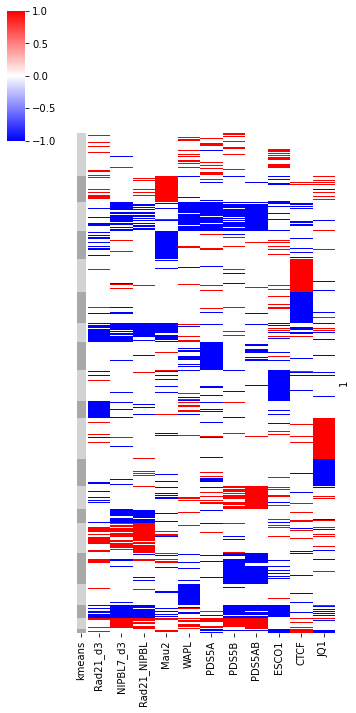

In [28]:
ncluster=20

df = pd.DataFrame(0, columns=samplelist, index=genelist)

for i, sample in enumerate(samplelist):
    df.loc[DEG[sample][1], sample] = 1

df["sum"] = df.sum(axis=1)
df = df.sort_values("sum", ascending=False)
df = df.drop('sum', axis=1)
for i, sample in enumerate(samplelist):
    smpl = DEG[sample]
    for genename, row in df.iterrows():
        if row[sample] == 1 and smpl[smpl[1] == genename][11].values[0] < 0:
            row[sample] = -1

from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(random_state=0, n_clusters=ncluster, max_iter=10000)
df["kmeans"] = model.fit_predict(df)

df = df.sort_values(by=['kmeans'])
lut = dict(zip(df["kmeans"].unique(), ["lightgray", "darkgray"]*100))
row_colors = df["kmeans"].map(lut)
val = df.iloc[:,0:df.shape[1]-1]
sns_plot = sns.clustermap(val, row_colors=row_colors, col_cluster=False, row_cluster=False,
                         figsize=(5, 10), cmap="bwr", yticklabels=False)
#sns_plot.savefig("DEGsimilarity.kmeans.heatmap.updown.top1000.k" + str(ncluster) + ".pdf")

In [86]:
for i in range(ncluster):
    df[df["kmeans"]==i].to_csv("updownDEGsimilarity.kmeans.updown.top1000.k" + str(ncluster) + ".cluster" + str(i) + '.tsv', sep="\t")
    
df.to_csv("ALLDEGs.updown.top1000.k" + str(ncluster) + ".tsv", sep="\t")